
# Assignment 3  <font color="blue"> (15 points) </font>
 
***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

Part A - 1: We will import numpy and use np.linespace to provide evenly spaced points, then raising them to the appropriate power with NumPy for the variable that follow.

In [2]:
import pandas as pd
import numpy as np

In [3]:
x1 = np.linspace(-20,20,100,endpoint=True)
x2 = np.power(x1,2)
x3 = np.power(x1,3)
x4 = np.power(x1,4)
x5 = np.power(x1,5)

Part A - 2: We will create the eps variable which will be the normally distributed error or noise term with mean=0 and standard deviation = 2. We will then create our response variable based off the equation 𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+eps

In [4]:
eps = np.random.normal(0,2,size=100)
y = 1.75 + 5*x1 + 0.05*x3 - 10.3*x5 + eps

Past A - 3: We will train a lasso model with CV = 5 with all covariates for our response variable.

In [5]:
df = pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"x4":x4,"x5":x5,"y":y})
X = df.drop("y",axis=1).copy()
y = df["y"]

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score,train_test_split
# Split data into train and test groups
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)
# Empty dictionary to keep MSE and alpha values together
mse_dict = {}
# emoty list for MSE values
mse_list = []
# list of alpha values
alpha_values = [0.05,0.1,0.5,1,1.5,2,3,5,10,20,50,100,1000]
for alpha1 in alpha_values:
  # instantial lasso with alpha
  lassoreg = Lasso(alpha=alpha1)
  # run CV and store in dict & list
  mse_cv = cross_val_score(lassoreg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
  mse_dict[alpha1] = -(mse_cv.mean())
  mse_list.append(-(mse_cv.mean()))
# select best alpha based on lowest MSE
best_alpha = min(mse_dict, key=mse_dict.get)
print("Best alpha for this Lasso is {} with an MSE of {}".format(best_alpha,mse_dict[best_alpha]))

Best alpha for this Lasso is 1000 with an MSE of 462.2406669195792


Part A - 4 : Plot the mse score from cross_val_score vs alpha tuning parameter to choose the best Lasso model then train the model and check the values of the coefficients to see if his Lasso performed variable selection.

Text(0.5, 0, 'Alpha')

Text(0, 0.5, 'MSE Score')

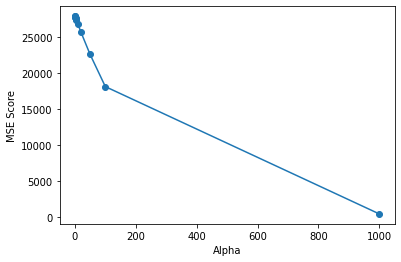

In [8]:
import matplotlib.pyplot as plt
plt.plot(alpha_values,mse_list, linestyle="-",marker="o")
plt.xlabel("Alpha")
plt.ylabel("MSE Score")
plt.show()


In [9]:
from sklearn.metrics import r2_score,mean_squared_error
# instantiate model with best alpha
lassoreg2 = Lasso(alpha=1000)
# train model
lassoreg2.fit(X_train,y_train)
# predict values with model and test data
y_pred = lassoreg2.predict(X_test)
# get R squared
r2 = r2_score(y_test,y_pred)
mse_test = mean_squared_error(y_test,y_pred)
print("\nTest R Squared: {}, \nTest MSE: {}".format(r2,mse_test))
# coefficients for model to see if variable selection is being done
coef = lassoreg2.coef_
print("\nWhen looking at the coefficients of the Lasso model\n {}\n its clear that the first and second coefficients is set to 0 so this model does perform variable selection".format(coef))

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


Test R Squared: 0.9999999999846235, 
Test MSE: 516.4538735372129

When looking at the coefficients of the Lasso model
 [ 0.00000000e+00 -0.00000000e+00  6.94580097e-02 -8.76149992e-06
 -1.03000122e+01]
 its clear that the first and second coefficients is set to 0 so this model does perform variable selection


## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


Part B - 1: We will load the Wage.csv file and select our variables after verifying both look like there are no issues in the data. We will then fit a polynomial regression with CV to select D and plot.

In [13]:
df = pd.read_csv("Wage.csv",index_col=0)
df = df.reset_index()
df.head()

,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [14]:
df.describe(include="all") # to look through the variables and the ones in question look ok

,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,NaN,NaN,NaN,1,5,4,5,1,2,2,2,NaN,NaN
top,NaN,NaN,NaN,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN,NaN
freq,NaN,NaN,NaN,3000,2074,2480,971,3000,1544,2142,2083,NaN,NaN
mean,218883.373000,2005.791000,42.414667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653905,111.703608
std,145654.072587,2.026167,11.542406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.857332,128.680488


In [15]:
# Select our variables to work with and split the data in the train and test sections
X_B = df[["age"]]
y_B = df['wage']
X_train_B,X_test_B,y_train_B,y_test_B = train_test_split(X_B,y_B,random_state=1,test_size=0.30)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

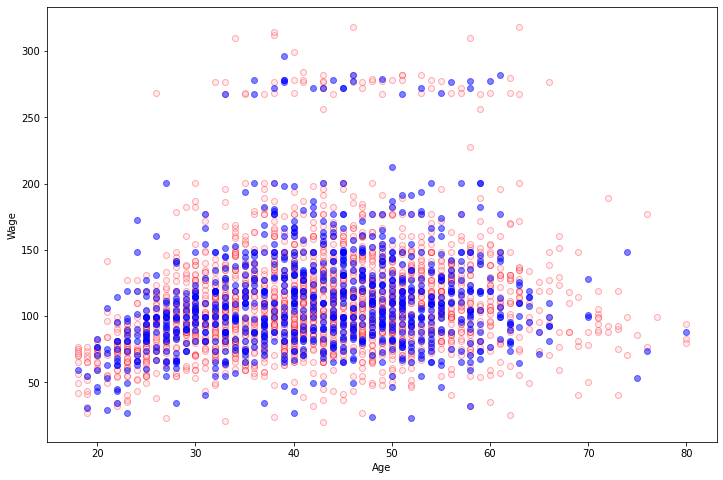

In [16]:
# lets visualize the data first as we did in the workbook 6
size = plt.figure(figsize=(12,8))
_ = plt.scatter(X_train_B,y_train_B,facecolor='pink', edgecolor='r', alpha=0.3)
_ = plt.scatter(X_test_B,y_test_B,facecolor = "blue", alpha = .5)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

In [23]:
# Use Cross Val to choose the best value for degree d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create list for MSE values
mse_list_b = []
for d in range(1,10):
  # instantiate tranformation function
  polynomial_features = PolynomialFeatures(degree = d)
  # tranform data
  X_train_p = polynomial_features.fit_transform(X_train_B)
  # instantiate linear model
  linear_model = LinearRegression()
  # get cross valiate score
  CV_score = cross_val_score(linear_model,X_train_p,y_train_B,cv=5,scoring="neg_mean_squared_error")
  # store score in list
  mse_list_b.append(-(CV_score.mean()))

# select lowest MSE score and degree
print("Best MSE score of {} is for Degree {}".format(min(mse_list_b),mse_list_b.index(min(mse_list_b))+1))

Best MSE score of 1584.3046383057947 is for Degree 7


In [24]:
# Run our model with degree 7 and transform/fit our data to then do so on the Test data
pf = PolynomialFeatures(degree=7)
# transform data
xp = pf.fit_transform(X_train_B)
lr = LinearRegression()
# fit linear model
lr.fit(xp,y_train_B)
# transform test data
xp_test = pf.transform(X_test_B)
# predict test values
y_pred = lr.predict(xp_test)
r2_b = r2_score(y_test_B,y_pred)
print("\nR Squared of our Polynomial Regression model is {}".format(r2_b))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R Squared of our Polynomial Regression model is 0.08542435521325964


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

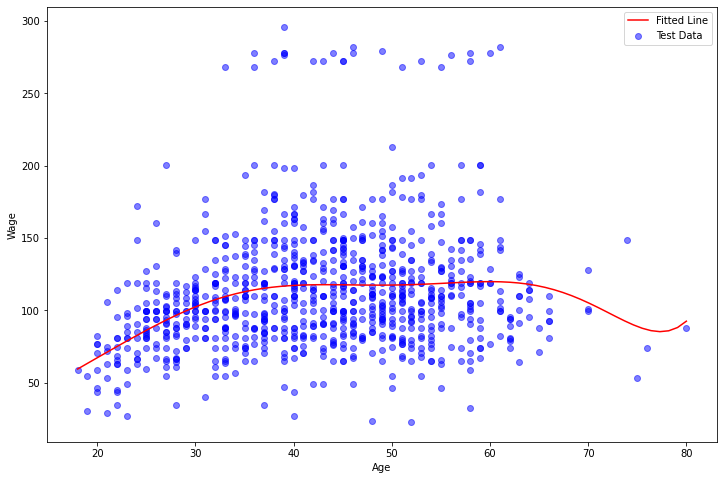

In [25]:
# we will plot our model
x_val = np.linspace(X_test_B.min(),X_test_B.max(),70)
x_val = np.array(x_val).reshape(-1,1)  
x_val_p = pf.transform(x_val)
y_val = lr.predict(x_val_p)

size = plt.figure(figsize=(12,8))
_ = plt.plot(x_val,y_val,ls="-",color="red")
_ = plt.scatter(X_test_B,y_test_B,facecolor = "blue", alpha = .5)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.legend(["Fitted Line","Test Data"])
plt.show()

Part B - 2: To fit a step function to the Age v Wage data and use Cross Validation to validate the number of cuts. We will manually cross validaqte using KFold since our step model is from StatsModel library which will not be compatible with SKLearns CV functions. We will then plot our best result.

In [27]:
# Convert X_train_B data into a series to be cut with pd.cut
X_train_B2 = X_train_B.squeeze()
X_train_B2

1045    45
2717    51
2835    32
2913    58
959     50
        ..
2763    44
905     49
1096    61
235     34
1061    29
Name: age, Length: 2100, dtype: int64

In [31]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from sklearn.model_selection import KFold

# instantiate KFold for cross validation
kf = KFold(n_splits=5,shuffle=True, random_state=1)
# create empty list for RSM values for models
rms_list = []
for cuts in range(1,11):
  rms_temp = []
  for train_index,test_index in kf.split(X_train_B2):
    # set up train and test set for cross validation
    train_x,test_x = X_train_B2.iloc[train_index],X_train_B2.iloc[test_index]
    train_y,test_y = y_train_B.iloc[train_index],y_train_B.iloc[test_index]
    
    # Dividing the data into bins
    df_cut, bins = pd.cut(train_x, cuts, retbins=True, right=True)
    # Concatenate the bins into the data and form a new dataframe df_steps
    df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)
    # Select wage column from the dataset
    df_steps_wage = df_steps['wage']
    # Create dummy variables for the age groups
    df_steps_dummies = pd.get_dummies(df_cut)
    # Fit Generalised linear model
    glm_model = sm.GLM(df_steps_wage, df_steps_dummies).fit()

    # Running the test dataset to get RMS values to choose the best number of cuts
    bin_mapping = np.digitize(test_x, bins,right=True)
    # Map validation data to bins
    X_valid = pd.get_dummies(bin_mapping)
    # predice data with model
    pred2 = glm_model.predict(X_valid)
    # calculate RMS value
    rms = sqrt(mean_squared_error(test_y, pred2))
    # Add RSM to list
    rms_temp.append(rms)
  # Add mean of Kth RSM values to list
  rms_list.append(np.mean(rms_temp))

print("Best RMS score of {} is for number of cuts: {}".format(min(rms_list),rms_list.index(min(rms_list))+1))

Best RMS score of 39.59947133588937 is for number of cuts: 8


In [29]:
# Set up model with 8 cuts as decided was optimal number of cuts.
df_cut_opt, bins_opt = pd.cut(X_train_B2, 8, retbins=True, right=True)
df_steps_opt = pd.concat([X_train_B2, df_cut_opt, y_train_B], keys=['age','age_cuts','wage'], axis=1)
df_steps_dummies_opt = pd.get_dummies(df_cut_opt)
# Fit final Generalised linear model
glm_model_final = sm.GLM(df_steps_opt.wage, df_steps_dummies_opt).fit()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

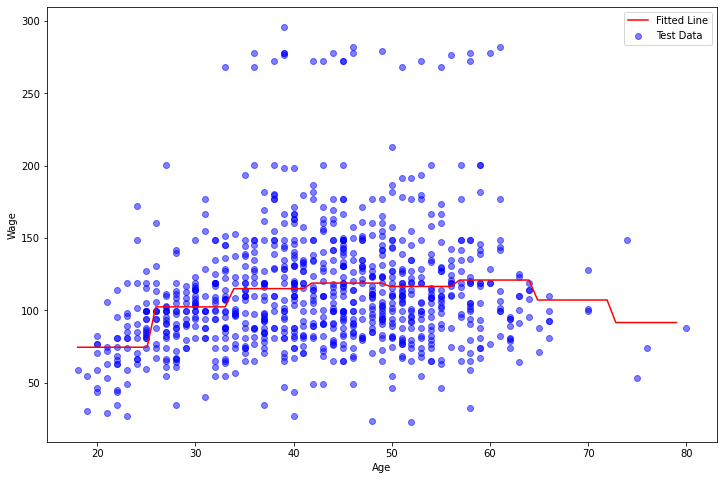

In [30]:
# we will plot our model
x_val = np.linspace(X_test_B.min(),X_test_B.max()-1,70)
bin_mapping = np.digitize(x_val,bins_opt).flatten()
x_val_2 = pd.get_dummies(bin_mapping)
y_val = glm_model_final.predict(x_val_2)

size = plt.figure(figsize=(12,8))
_ = plt.plot(x_val,y_val,ls="-",color="red")
_ = plt.scatter(X_test_B,y_test_B,facecolor = "blue", alpha = .5)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.legend(["Fitted Line","Test Data"])
plt.show()


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


We will use the Diabetes dataset downloaded from the McGill class portal and do the analysis on that one.

In [32]:
df = pd.read_csv("diabetes.csv")
df.describe(include='all')
df[df["mass"]==0].count()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


preg     11
plas     11
pres     11
skin     11
test     11
mass     11
pedi     11
age      11
class    11
dtype: int64

In [33]:
# drop rows with mass of 0 which does not make sense. There are 11 out of 768 rows so it should not cause any issues
to_drop = df[df["mass"]==0]
# select indeces of rows to drop
to_drop_index = list(to_drop.index)
# drop rows with mass of 0
df_clean = df.drop(to_drop_index,axis=0).copy()

In [34]:
# separate into X & y
y = df['class'].copy()
X = df.drop("class",axis=1).copy()

In [35]:
# split train and test data
X_train_C,X_test_C,y_train_C,y_test_C = train_test_split(X,y,random_state=1,test_size=0.3)

In [36]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# instanciate model
rf = RandomForestClassifier()
# select parameters to run with GridSearchCV
params= {
    'n_estimators': [100,200,300],
    'min_samples_split': [2, 3, 5],
    'criterion': ['gini', 'entropy'],
}
search = GridSearchCV(rf, params, cv= 5, scoring= 'accuracy')
search.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [37]:
# find best score and best parameters
search.best_score_
search.best_params_
rf_opt = search.best_estimator_

0.7634994807892004

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 200}

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
# predict values with optimal model
y_pred_rf = rf_opt.predict(X_test_C)
# print confusion matrix and classification report
print(confusion_matrix(y_test_C,y_pred_rf))
print(classification_report(y_test_C,y_pred_rf))

[[133  13]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       146
           1       0.81      0.65      0.72        85

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



In [39]:
# Support Vector Machine Classifier
from sklearn.svm import SVC
# Parameters to be tested with GridSearchCV
params_svc= {
    'C': [0.5,5,100,1E6],
    'kernel': ['rbf']
}
# Instantiate model
svc = SVC()
# Run search model
svc_search = GridSearchCV(svc, params_svc, cv= 5, scoring = 'accuracy')
svc_search.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 5, 100, 1000000.0], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [40]:
# find best score and best parameters
svc_search.best_score_
svc_search.best_params_
svc_opt = search.best_estimator_
# predict test data with best model
y_pred_svc = svc_opt.predict(X_test_C)
# print confusion matrix and classification report
print("\n{}".format(confusion_matrix(y_test_C,y_pred_svc)))
print(classification_report(y_test_C,y_pred_svc))

0.7448944271374177

{'C': 5, 'kernel': 'rbf'}


[[133  13]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       146
           1       0.81      0.65      0.72        85

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



In this dataset, Random Forest did slightly better at classifying the training set but the test results were the same in scoring. Random Forest was much faster at computing the results, in fact with Grid Search for SVC we had to limit our choices due to the time of computation. For both these reasons, the recommendation is to select Random Forest Classifier.

## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


Part D - 1: Using NumPy to provide multivariate normal distributions for the gausian clusters

In [45]:
# Import packages
import collections
import glob
import pprint
from sklearn.cluster import KMeans


In [46]:
# Parameters of the simulated mutivariate gaussian distribution
mean_d1 = [0, 0]
mean_d2 = [5, 8]
mean_d3 = [6, 1]
# covariance matrix for the gaussian distributions
cov = [[1, 0], [0, 1]] 
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 500).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 500).T
x3, y3 = np.random.multivariate_normal(mean_d3, cov, 500).T
# colors for clusters
color = np.array(["red" for i in range(500)]+["blue" for i in range(500)]+["green" for i in range(500)]) 
# Hide our labels
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
# merge and create dataframe
data = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])

Part C - 2: plotting the clusters with a scatterplot

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Illustration of three gaussian distributions')

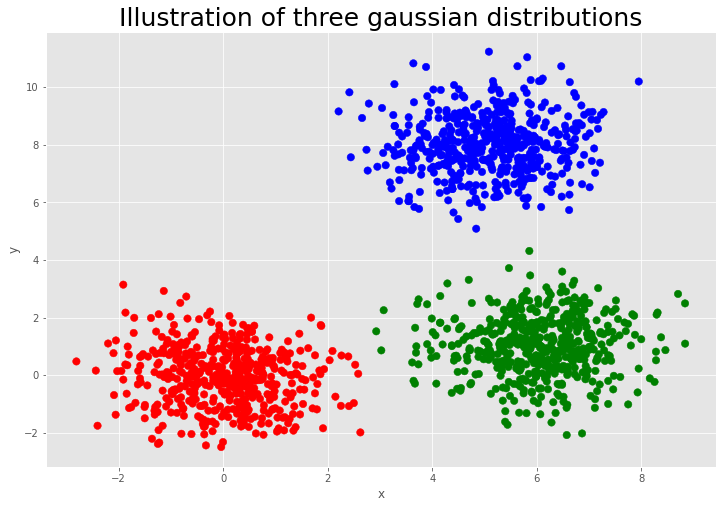

In [50]:
# Plot the clusters
size = plt.figure(figsize = (12,8))
_ = plt.scatter([x1,x2,x3], [y1,y2,y3],color=color,s=220, marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Illustration of three gaussian distributions', fontsize=25)
plt.show()


Part C - 3 Shuffle data then use K-means of 2,3,4 to cluster the data.

In [51]:
# Shuffle the data
data_shuffled = data.sample(frac=1)

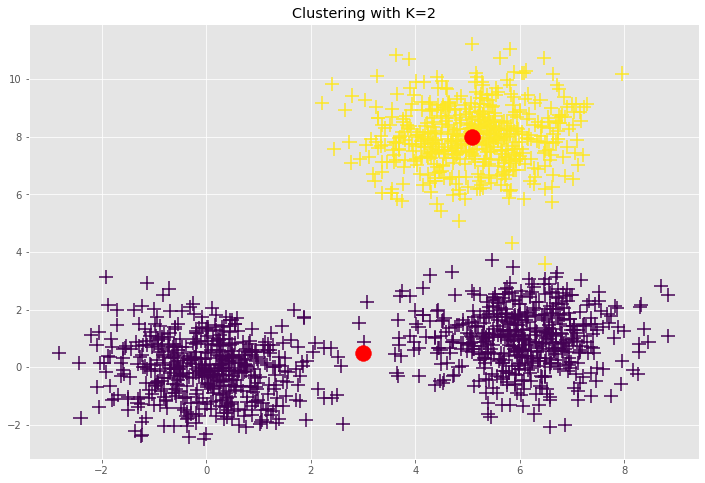

In [52]:
# K = 2
# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(data_shuffled)
# Getting the cluster labels
labels = kmeans.predict(data_shuffled)
# Centroid values
centroids = kmeans.cluster_centers_

size = plt.figure(figsize = (12,8))
plot = plt.scatter(data_shuffled['x'], data_shuffled['y'], c= labels, s=200, marker = "+") 
plot = plt.scatter(centroids[:,0], centroids[:,1], c='red', s=1000, marker = ".")
plot = plt.title("Clustering with K=2")

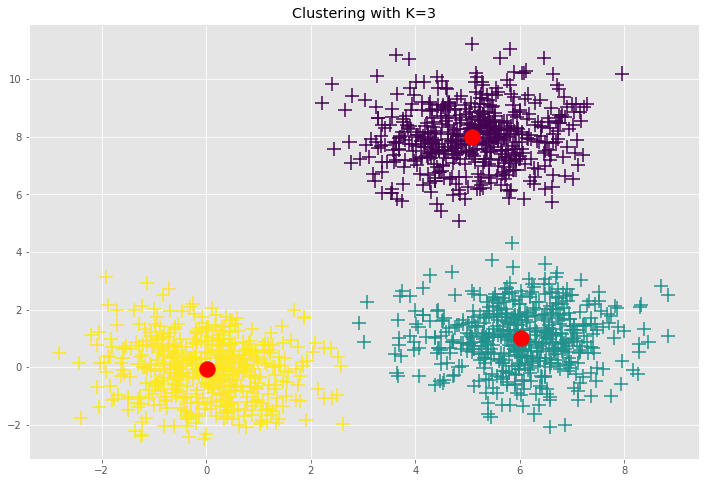

In [53]:
# K = 3
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data_shuffled)
# Getting the cluster labels
labels = kmeans.predict(data_shuffled)
# Centroid values
centroids = kmeans.cluster_centers_

size = plt.figure(figsize = (12,8))
plot = plt.scatter(data_shuffled['x'], data_shuffled['y'], c= labels, s=200, marker = "+") 
plot = plt.scatter(centroids[:,0], centroids[:,1], c='red', s=1000, marker = ".")
plot = plt.title("Clustering with K=3")

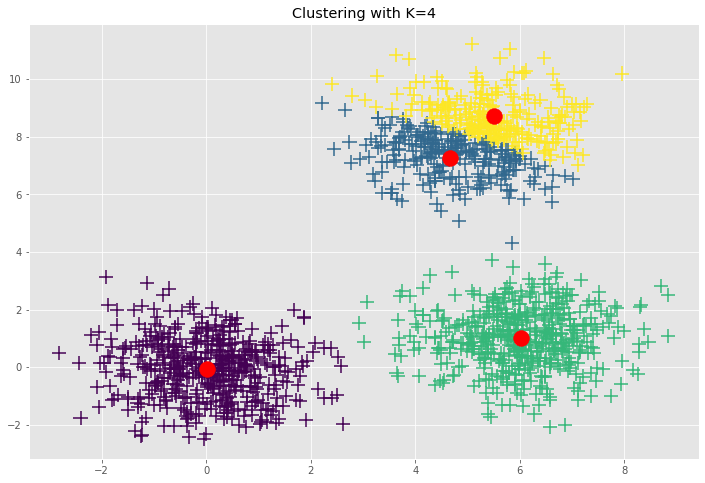

In [54]:
# K = 4
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(data_shuffled)
# Getting the cluster labels
labels = kmeans.predict(data_shuffled)
# Centroid values
centroids = kmeans.cluster_centers_

size = plt.figure(figsize = (12,8))
plot = plt.scatter(data_shuffled['x'], data_shuffled['y'], c= labels, s=200, marker = "+") 
plot = plt.scatter(centroids[:,0], centroids[:,1], c='red', s=1000, marker = ".")
plot = plt.title("Clustering with K=4")